<a href="https://colab.research.google.com/github/athersoft/ADA-Informes/blob/main/Informe%2010%20-%20Problema%20de%20la%20mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de la mochila

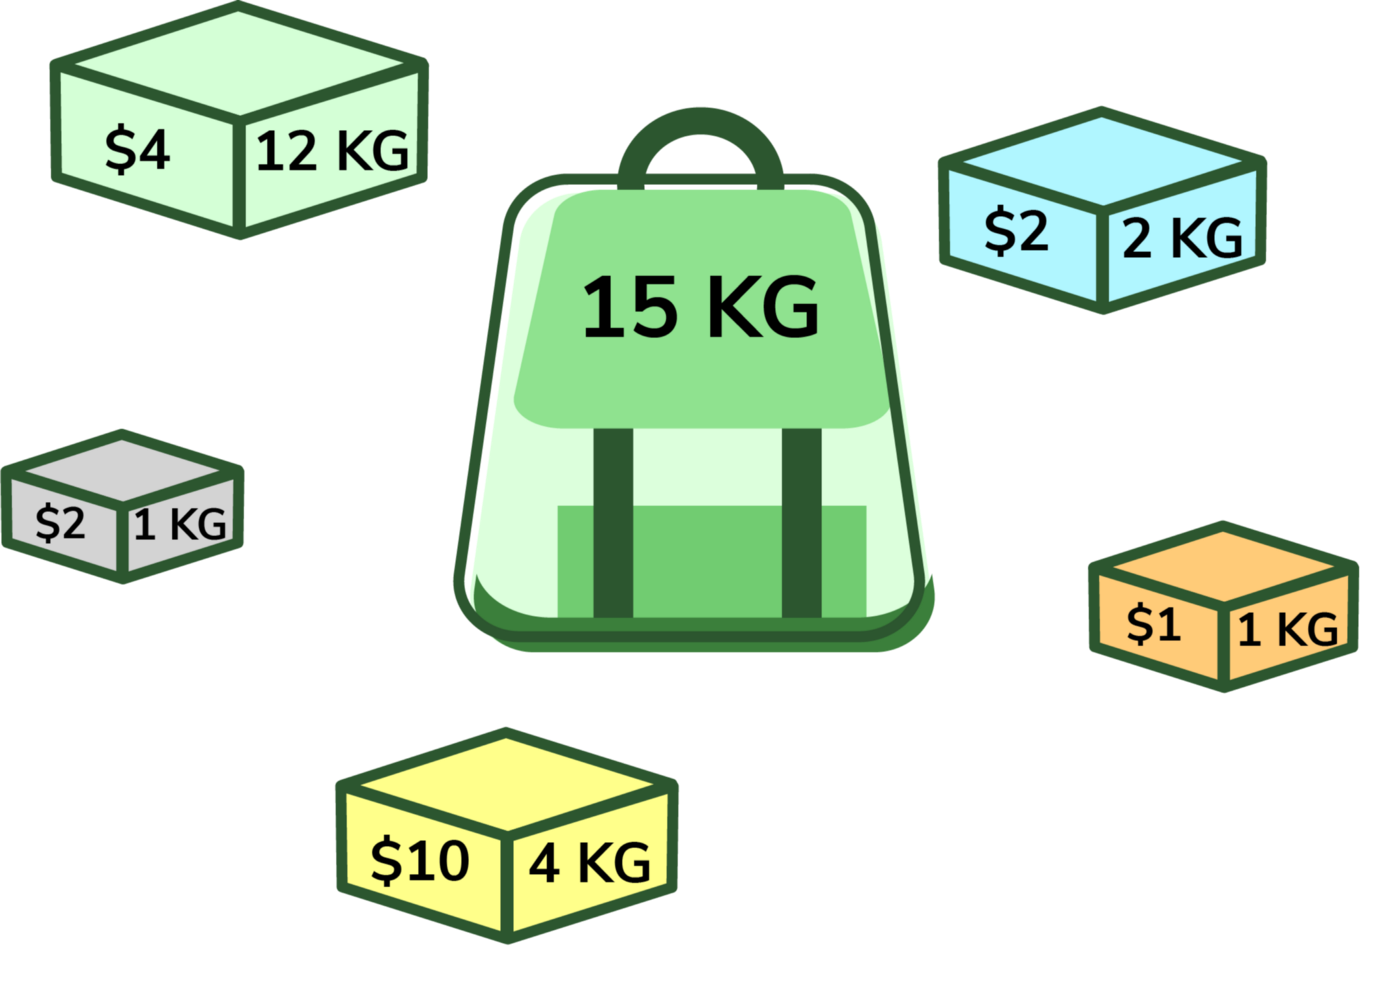

#1-Descripción del problema

Entrada: Tamaño de una mochila, y conjunto de elementos con determinado peso y valor.

Salida: Mayor ganancia que se puede obtener de los elementos de entrada según capacidad de la mochila.

El problema de la mochila consiste en un conjunto de elementos, cada uno con un peso $P$ y valor $V$, los cuales se busca almacenar en una mochila de capacidad $W$, con el propósito de maximizar el valor total de los elementos en la mochila dentro de su capacidad.

El problema de la mochila tiene la propiedad de una subestructura óptima, es decir, que podemos construir la solución óptima del problema de k variables a partir del problema de k - 1 variable.

#2-Código

#2.1 Versión Dinámica

In [74]:
def knapSack(W, wt, val, n, cont, verbose):
 
    K = [[0 for x in range(W+1)] for y in range(2)]
     
    for i in range(n + 1):
        for w in range(W + 1):
            cont[0] += 1
            if (i == 0 or w == 0):
                K[i % 2][w] = 0
            elif (wt[i - 1] <= w):
                K[i % 2][w] = max(
                    val[i - 1]
                    + K[(i - 1) % 2][w - wt[i - 1]],
                    K[(i - 1) % 2][w])
              
 
            else:
                K[i % 2][w] = K[(i - 1) % 2][w]
            
        if verbose:
            print("Maximo obtenible considerando los primeros", i, "elementos:", K[i % 2][w])

    return K[n % 2][W]

verbose = False 
cont = [0]

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
 
print("Maxima ganancia:", knapSack(W, wt, val, n, cont, verbose))

if verbose:
  print("Total de subproblemas resueltos:", cont[0])

Maxima ganancia: 220


##Descipción del algoritmo:

El acercamiento bottom up almacena en una matriz los valores posibles que se pueden obtener en cada combinación de artículos, tomando como punto de referencia  los valores obtenidos anteriormente.

##Ejecución paso a paso

Con la opción verbose = True podemos observar la máxima ganancia que se puede obtener considerando cada elemento, obviamos la resolución de los subproblemas en cada uno de estos resultados por su extensión.

Se consederarán las siguientes tablas de valores y pesos correspondientemente: 

$valores = [60, 100, 120]$

$pesos = [10, 20, 30]$

Maximo obtenible considerando los primeros 0 elementos: 0

Maximo obtenible considerando los primeros 1 elementos: 60

Maximo obtenible considerando los primeros 2 elementos: 160

Maximo obtenible considerando los primeros 3 elementos: 220

Maxima ganancia: 220

Total de subproblemas resueltos: 204

##Tiempo de ejecución

La implementación de este algoritmo crea una matriz $n*W$, donde $n$ son los elementos que se pueden guardar, y $W$ siendo el peso total que soporta la mochila.

El bucle menor guarda el valor óptimo para los pesos posibles, consiguiendo el valor máximo de cada uno de estos al agregar un elemento. Esta operación tiene un tiempo total de $O(W)$.

Para obtener el valor óptimo en el peso pedido se deben de resolver los problemas que conlleva agregar cada elemento. Lo que significa que se tienen que resolver $W$ sub-problemas al agregar cada elemento, ya que calcula cada valor óptima para las combinación de pesos. Es decir que que resuelve $(n-1)*W$ sub-problemas antes del final.

En resumidad cuentas, el algoritmo intenta resolver $n$ veces un problema que tiene un tiempo de $O(W)$, por esto esta implementación del algoritmo dinámico posee un tiempo total de $O(n*W)$.

##Correctitud
###Teorema

El algoritmo retorna la mayor ganancia de una mochila con capacidad $W$ utilizando $n$ elementos con sus respectivos pesos y valores.

###Prueba del Teorema

Para corroborar el teorema utilizaremos la siguiente propiedad invariante de bucle:
> En cada iteración $i$ correspondiente al bucle mayor, se guardará el máximo precio del sub-problema actual. 

####Inicialización

En la primera iteración $i = 1$, se tendran los valores para cada $w$, al intentar el valor anterior $i-1=0$. Como ese elemento no existe, tiene un peso y un valor predeterminado ($0$), los cuales son agregados a la mochila, pero sin modificar ni el valor total ni el peso de la misma, por lo que podemos decir que es correcto.

####Mantención

Asumiendo que al comienzo de cada iteración se cumple la propiedad. Es decir, al agregar un elemento $i$ se obtiene un valor óptimo, por lo que tendremos este valor para cada peso al agregar los elementos $i = i-1$.

    Considerando que $x = i$, con $x<n$.

Dentro del bucle menor ($0\leq j\leq W$), se obtiene el valor máximo del sub-problema donde se agrega un elemento $x$ con un peso $w$, el cual la mochila es capaz de soportar.

Si la mochila no es capaz de soportar ese peso, el valor óptimo es el que se tenia en el elemento $x-1$.

Si $x$ posee un peso que la mochila puede soportar, se compararan los siguientes punto:

    El valor máximo actual con el peso que tenia hasta $x-1$

    EL precio de $x$ sumado al valor óptimo de una mochila que soporte el peso de $x$

El que resulte mayor se guardará como el valor óptimo para la mochila en la iteración $j$ al intentar guardar el elemento $x$ en el bucle mayor.

Con los resultados del bucle menor, se calcula el valor para la mochila con peso $w \leq W$ en la iteración $i$. Este sería el valor óptimo del problema con $x = n$.

    Finalizando la iteración $i=x$ se seguirá cumpliendo la propiedad.


Como la propiedad es correcta podemos decir que al finalizar la k-ésima iteración del bucle mayor, se tendrá el valor máximo de una mochila que aguanta un peso de $W$, al intentar agregarle $n$ elementos.


#2.2 Versión Greedy

In [66]:
def greedy(W, wt, val, iteraciones, verbose):
    n = len(val)
    total = 0
    totalW = 0
    max = -1

    if verbose:
      print("Capacidad de la mochila", W)

    while True:
      iteraciones[0] += 1
      max = -1
      maxVal = 0
      for i in range(0,n): 
        iteraciones[0] += 1
        if val[i]/wt[i] > maxVal and (wt[i]+totalW) <= W:
          maxVal = val[i]/wt[i]
          max = i

      if max == -1: 
        if verbose:
          print("\nNo hay más elementos que puedan entrar en la mochila")
        break

      if verbose:
        print("\nValor de los elementos restantes:", val)
        print("Peso de los elementos restantes:", wt)
        print("Ingresado elemento con valor", val[max], "y peso", wt[max])

      totalW += wt[max]
      total += val[max]
      val.pop(max)
      wt.pop(max)
      n-=1

      if verbose:
        print("Peso en la mochila", totalW)
        print("Capacidad restante en la mochila", W-totalW)
        print("Valor de los elementos en la mochila:", total)

    return total

verbose = False
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50

iteraciones = [0]

print("\nMaxima ganancia obtenible:",greedy(W, wt, val, iteraciones, verbose))
if verbose:
  print("Iteraciones totales:", iteraciones[0])


Maxima ganancia obtenible: 160


##Descripción del algoritmo:

Este acercamiento se la "juega" por una solución, pero no considera todas las combinaciones posibles, este toma el mejor elemento en relación valor/peso y lo mete a la mochila, repitiendo este proceso hasta que no haya ningún elemento que cumpla la condición.

#Ejemplo paso a paso de la solución greedy:

Para observar el funcionamiento del algoritmo, utilizaremos la opción verbose = True,
Se consederarán las siguientes tablas de valores y pesos correspondientemente:

$valores=[60,100,120] $

$pesos=[10,20,30]$


Capacidad de la mochila 50

Valor de los elementos restantes: [60, 100, 120]

Peso de los elementos restantes: [10, 20, 30]

Ingresado elemento con valor 60 y peso 10

Peso en la mochila 10

Capacidad restante en la mochila 40

Valor de los elementos en la mochila: 60


Valor de los elementos restantes: [100, 120]

Peso de los elementos restantes: [20, 30]

Ingresado elemento con valor 100 y peso 20

Peso en la mochila 30

Capacidad restante en la mochila 20

Valor de los elementos en la mochila: 160

No hay más elementos que puedan entrar en la mochila

Maxima ganancia obtenible: 160

Iteraciones totales: 9

##Tiempo de ejecución

El tiempo de ejecución la la implementación greedy es $O(n)$ en su caso promedio, esto se debe a que el algoritmo realizará $x$ cantidad de iteraciones, pero cada iteración subsecuente recorrerá $n-1$ elementos, sin embargo, el tiempo puede variar ligeramente según el caso, pero esta variación solo cambiará la constante multiplicativa, por lo que el algoritmo se mantiendrá con tiempo de ejecución $O(n)$

#Por qué no es correcta la solución Greedy?

Con esta implementación estamos seleccionando el elemento con mejor relación valor/peso, sin embargo, no estamos considerando la combinación óptima de elementos en relación a la capacidad de la mochila.

#3-Experimentos

##1-Tiempo de ejecución



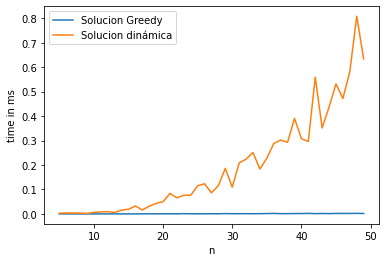

In [54]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

x=[]; y=[]; x2=[]; y2=[]

for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)
  cont = [0]

  t = repeat(setup="from __main__ import greedy", stmt=f"greedy({W},{wt},{val},{cont}, {False})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import knapSack", stmt=f"knapSack({W},{wt},{val},{len(val)},{cont},{False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  x2.append(n)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Solucion Greedy", "Solucion dinámica"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis de resultados

La gráfica nos permite apreciar que la versión dinámica para solucionar este problema es considereblemente más lenta que la versión greedy, esto se debe a que este último tiene una complejidad temporal lineal.

##2-Numero de iteraciones/subproblemas

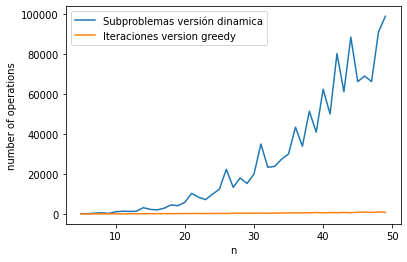

In [36]:
import matplotlib.pyplot as plt

x=[n for n in range(5,50)] 
y=[]; 
y2=[]

for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)
  cont = [0]
  it = [0]

  knapSack(W, wt, val, len(val), cont, False)
  y.append(cont[0])

  greedy(W, wt, val, it, False)
  y2.append(it[0])

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Subproblemas versión dinamica", "Iteraciones version greedy"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

###Análisis de resultados:

Los resultados de este experimento concuerdan con obtenidos en el experimento anterior, siendo el número de subproblemas a resolver en la implementación dinmámica, mucho mayor al número de iteraciones de la versión greedy.

#3-Valores obtenidos


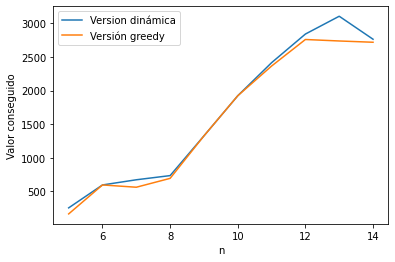

In [75]:
import matplotlib.pyplot as plt

x=[n for n in range(5,15)] 
y=[]; 
y2=[]

for n in range(5,15):
  W, val, wt = knapsack_instance_generator(n)
  W2, val2, wt2 = W, val, wt
  cont = [0]
  it = [0]

  a = knapSack(W, wt, val, len(val), cont, False)
  y.append(a)

  b = greedy(W2, wt2, val2, it, False)
  y2.append(b)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Version dinámica", "Versión greedy"])

plt.xlabel('n')
plt.ylabel('Valor conseguido')
plt.show()

###Análisis de resultados

Si bien como vimos anteriormente el algoritmo greedy es mucho más rápido, este no selecciona la solución óptima, esto es apreciable en la gráfica ya que esta muestra que en la versión dinámica obtenemos un valor mejor en la mayoría de casos a comparación de los que obtenemos con la implementación greedy.